# Biased Memory Toolbox (example)

First import all relevant libraries.

In [1]:
import biased_memory_toolbox as bmt
from datamatrix import io, operations as ops, DataMatrix
import numpy as np
from matplotlib import pyplot as plt

Read in a data file as a DataMatrix. There should be a column that contains
the memoranda (here: `hue1`) and a column that contains the responses (here:
`hue_response`), both in degrees with values between 0 and 360.

Next, we use the `response_bias()` function from `biased_memory_toolbox`
(imported as `bmt`) to calculate the `response bias`, which is the response
error in the direction of the category prototype. We use the default categories
as defined in the toolbox.

In [2]:
dm = io.readtxt('data_category.csv')
dm.response_bias = bmt.response_bias(
    dm.hue1,
    dm.hue_response,
    bmt.DEFAULT_CATEGORIES
)

Next, we loop through all participants, and for each participant separately
fit a mixture model to `response_bias`, resulting in a precision, guess rate,
and bias. This is done with `bmt.fit_mixture_model()`.

We also check whether participants responded above chance. This is done by
`bmt.test_chance_performance()`.

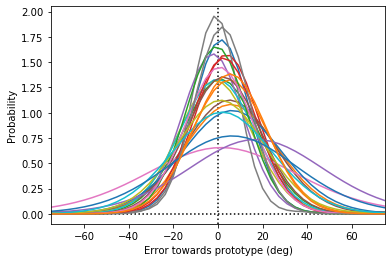

In [5]:
# Initialize an empty DataMatrix that will contain the fit results for each
# participant.
sm = DataMatrix(dm.sessionid.count)
sm.precision = -1
sm.guess_rate = -1
sm.bias = -1
sm.sessionid = -1
sm.p_chance = -1
# Intialize a plot that will contain the fits for individual participants.
plt.xlim(-75, 75)
plt.xlabel('Error towards prototype (deg)')
plt.ylabel('Probability')
plt.axvline(0, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
# Split the DataMatrix (dm) based on session id, such that we loop through the
# data for each participant separately (as sdm).
for row, (sessionid, sdm) in zip(sm, ops.split(dm.sessionid)):
    row.sessionid = sessionid
    # Fit the mixture model and assign the parameters to the row of `sm`.
    row.precision, row.guess_rate, row.bias = bmt.fit_mixture_model(sdm.response_bias)
    # Test chance performance. The first return value is the t value, which we
    # don't use. The second return value is the p value, which we assign to
    # the row of `sm`.
    _, row.p_chance = bmt.test_chance_performance(
        sdm.hue1,
        sdm.hue_response    
    )
    # Plot the model results for the participant.
    x = np.linspace(-180, 180, 100)
    y = bmt.mixture_model_pdf(x, row.precision, row.guess_rate, row.bias)
    plt.plot(x, y)
io.writetxt(sm, 'mixture-model-results.csv')

Show the results!

In [4]:
sm

bias,guess_rate,p_chance,precision,sessionid
1.42169512005894,0.05218551559106707,1.4367519187691966e-28,1189.790551670396,1585729859935
5.6674788892752685,0,5.198522402699382e-38,436.8682896089828,1585737073858
1.172234602439902,0,9.19059498322824e-27,653.0879093614705,1585743098923
3.7708325537259193,0.009067613759493443,4.446047043404447e-34,923.5287398168846,1585913928047
-2.390342330101382,0.03817460751304503,7.04930284672542e-26,981.3190247625956,1586163908761
5.186441158681302,0,7.213062382939936e-26,470.8965897179357,1586166725331
1.4725591156335422,0,3.1240355013374006e-08,172.18931782915718,1586195085500
-1.0919145306776252,0.13468622966190325,2.940248468856495e-29,1819.0147927411028,1586254696064
-1.1558291128740006,0.04822669746610845,2.1264316443013104e-35,697.7585764690244,1586265521442
-0.2238325290124917,0,3.3346774527290364e-29,651.5985605391345,1586515593237
